Import stuff

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# landlab modules
from landlab.plot.graph import plot_nodes, plot_links
from landlab.io import read_esri_ascii

# Package for plotting raster data
from landlab.plot.imshow import imshow_grid
from landlab.grid.create_network import network_grid_from_raster

from landlab.grid.create_network import (
    AtMostNodes,
    JustEndNodes,
    SpacingAtLeast,
    spacing_from_drainage_area,
)

ImportError: DLL load failed: The specified module could not be found.

local directory for other DEMs

In [2]:
DEM_dir = r'C:\Users\sahrendt\OneDrive\525 Tectonic Geomorphology\Final_Proposal\data'

load DEM 1 as grid

In [74]:
grid, z = read_esri_ascii(os.path.join(DEM_dir, "stillaguamish_elev_100m_gdalwarp.asc"), name="topographic__elevation")
grid.status_at_node[~np.ma.masked_where(z > 0, z).mask] = grid.BC_NODE_IS_CLOSED

In [80]:
# grid.set_watershed_boundary_condition('topographic__elevation', 0., True)

Really need this below line to make it run--need to set watershed boundary condition, here I just set it as the left edge since the channel outlet abuts there, but you can also run the above line and choose one of those

In [78]:
grid.status_at_node[grid.nodes_at_left_edge] = grid.BC_NODE_IS_FIXED_VALUE

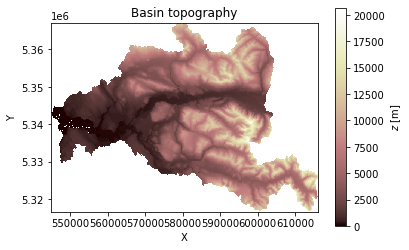

In [79]:
imshow_grid(
    grid,
    "topographic__elevation",
    plot_name="Basin topography",
    color_for_closed=None,
    colorbar_label="$z$ [m]",
)

Generate network (every node possible)
* be SURE you have a ballpark minimum channel threshhold
* AND outlet node defined
* otherwise it will take forever

In [81]:
network_grid = network_grid_from_raster(
    grid,
    minimum_channel_threshold=50000000,
    include=["drainage_area", "topographic__elevation"],
)

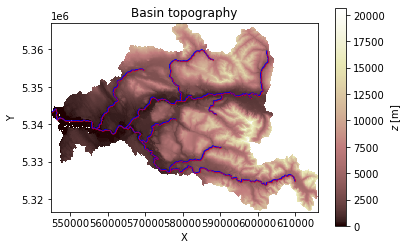

In [86]:
imshow_grid(
    grid,
    "topographic__elevation",
    plot_name="Basin topography",
    color_for_closed=None,
    colorbar_label="$z$ [m]",
)
plot_links(network_grid, with_id=False)
plot_nodes(network_grid, with_id=False, markersize=0.2)

most nodes per segment=4
* note: this seems to end up with the segments getting longer towards the headwaters. This probably isn't best for stability? (It would actually be better if the opposite was true)

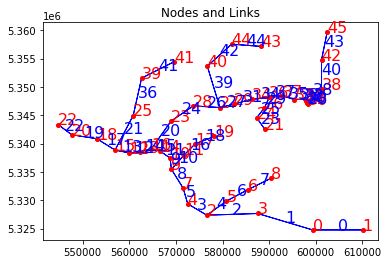

In [91]:
network_grid = network_grid_from_raster(
    grid,
    reducer=AtMostNodes(count=4),
    minimum_channel_threshold=50000000,
    include=["drainage_area", "topographic__elevation"],
)

plot_nodes(network_grid, markersize=4)
plot_links(network_grid)
plt.title("Nodes and Links");

In [98]:
spacing

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

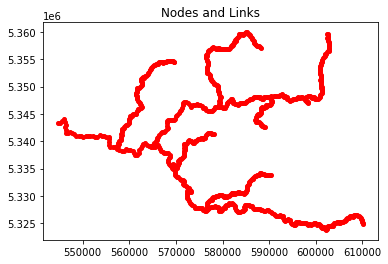

In [93]:
spacing = spacing_from_drainage_area(grid.at_node["drainage_area"])

network_grid = network_grid_from_raster(
    grid,
    reducer=SpacingAtLeast(grid.xy_of_node, spacing),
    minimum_channel_threshold=50000000,
    include=["drainage_area", "topographic__elevation"],
)

plot_nodes(network_grid, with_id=False, markersize=4)
plot_links(network_grid, with_id=False)
plt.title("Nodes and Links");

In [96]:
grid.size

<bound method GraphFields.size of RasterModelGrid((506, 716), xy_spacing=(100.0, 100.0), xy_of_lower_left=(544725.0, 5316655.0))>